In [1]:
import pandas as pd
from io import StringIO
import requests

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

# Column names as per the dataset's description
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Fetch the dataset
response = requests.get(url)
data = response.text

# Load the dataset into a pandas DataFrame
df = pd.read_csv(StringIO(data), header=None, names=columns)

# Display the first few rows of the DataFrame
print(df.head())


         ID Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26  featu

In [2]:
# Preprocessing
df = df.drop(columns=['ID'])  # Drop ID column
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})  # Convert labels to 0 (benign) and 1 (malignant)

X = df.iloc[:, 1:].values  # Features
y = df.iloc[:, 0].values  # Labels


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


In [6]:

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy (No Noise): {accuracy:.4f}")
print("Confusion Matrix (No Noise):\n", conf_matrix)

Accuracy (No Noise): 0.9737
Confusion Matrix (No Noise):
 [[71  0]
 [ 3 40]]


In [7]:
# Add Gaussian Noise with Different Variances
variances = [50, 100, 200, 400, 800]
accuracies = []

for var in variances:
    noise = np.random.normal(0, np.sqrt(var), X.shape)
    X_noisy = X + noise
    X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Accuracy with noise variance {var}: {acc:.4f}")


Accuracy with noise variance 50: 0.9474
Accuracy with noise variance 100: 0.9474
Accuracy with noise variance 200: 0.9474
Accuracy with noise variance 400: 0.9386
Accuracy with noise variance 800: 0.9298


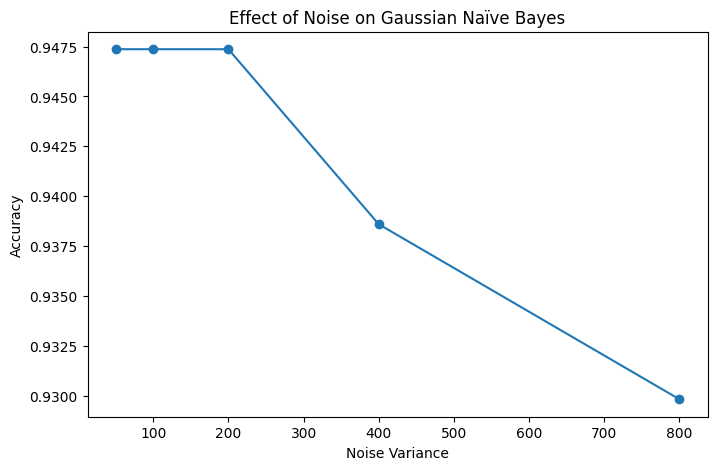

In [8]:
# Plot Accuracy vs Noise Variance
plt.figure(figsize=(8, 5))
plt.plot(variances, accuracies, marker='o')
plt.xlabel("Noise Variance")
plt.ylabel("Accuracy")
plt.title("Effect of Noise on Gaussian Naïve Bayes")
plt.show()